# Libraries for Neural Networks - PyTorch



## Import Libraries

Installs a specific PyTorch version

In [1]:
%%capture
!pip install torch==1.5.0+cu101 torchvision==0.6.0+cu101 -f https://download.pytorch.org/whl/torch_stable.html

In [44]:
import torch
from sklearn.model_selection import train_test_split
from sklearn import datasets
from matplotlib import pyplot as plt
import numpy as np
from sklearn.metrics import accuracy_score, confusion_matrix
import torch.nn as nn
torch.__version__

'1.5.0+cu101'

## Loading the dataset
The data set contains a table with 30 features for 569 subjects

In [3]:
breast = datasets.load_breast_cancer()
breast.data.shape

(569, 30)

Let's take a look at what the data looks like

In [4]:
breast.data

array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]])

This is how the header of the columns (the names of the features) looks like.

In [5]:
breast.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

And this is how the labeling of the data can be displayed. As you can see the labeling is binary.

In [6]:
breast.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

According to the labeling: 0 - malignant (גידול ממאיר) and 1 - benign (גידול שפיר).

In [7]:
breast.target_names

array(['malignant', 'benign'], dtype='<U9')

## Data Preprocessing

### Splitting the dataset into the Training set and Test set

We will split the data into features and labeling (X,y)

In [28]:
X = breast.data
y = breast.target

We will separate the training set from the test set

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

In [30]:
X_train.shape

(426, 30)

In [31]:
X_test.shape

(143, 30)

### Data transformation


When we use Pytorch we will have to work with a different type of data structure and not a Numpy array

In [32]:
type(X_train)

numpy.ndarray

Therefore, we will convert the data structure type to PyTorch Tensor

In [33]:
X_train = torch.tensor(X_train, dtype=torch.float)
y_train = torch.tensor(y_train, dtype=torch.float)

In [34]:
type(X_train)

torch.Tensor

Now we will use Tensor Dataset to connect the features and labeling and create a complete dataset. And now we can work with this data in PyTorch neural networks.

In [35]:
dataset = torch.utils.data.TensorDataset(X_train, y_train)

In [36]:
type(dataset)

torch.utils.data.dataset.TensorDataset

Now we will use Data loader. It will combines a dataset and a sampler, and provides an iterable over the given dataset (also divides the data into batches(.

In [37]:
train_loader = torch.utils.data.DataLoader(dataset, batch_size=10)

## Neural network structure
30 -> 16 -> 16 -> 1

In [38]:
network = nn.Sequential(nn.Linear(in_features=30, out_features=16),
                        nn.Sigmoid(),
                        nn.Linear(16, 16),
                        nn.Sigmoid(),
                        nn.Linear(16, 1),
                        nn.Sigmoid())

Network summary

In [39]:
network.parameters

<bound method Module.parameters of Sequential(
  (0): Linear(in_features=30, out_features=16, bias=True)
  (1): Sigmoid()
  (2): Linear(in_features=16, out_features=16, bias=True)
  (3): Sigmoid()
  (4): Linear(in_features=16, out_features=1, bias=True)
  (5): Sigmoid()
)>

Now we will create a Loss function (binary cross entropy) and optimizer

In [40]:
loss_function = nn.BCELoss()

In [41]:
optimizer = torch.optim.Adam(network.parameters(), lr = 0.001)

## Training the neural network on the Training se

In [42]:
epochs = 100
avg_loss = 0
loss_list, epochs_list = [], []

In [43]:
for epoch in range(epochs):
  running_loss = 0.

  for data in train_loader:
    batch_features, batch_labels = data
    optimizer.zero_grad()

    predictions = network.forward(batch_features) 
    loss = loss_function(predictions, batch_labels)
    loss.backward()
    optimizer.step()

    running_loss += loss.item()
  if running_loss != 0:
    avg_loss = running_loss / len(train_loader)

  loss_list.append(avg_loss)
  epochs_list.append(epoch)

  print('Epoch: ' + str(epoch + 1) + ' loss: ' + str(avg_loss))

Epoch: 1 loss: 0.6881840797357781
Epoch: 2 loss: 0.6563529192015182
Epoch: 3 loss: 0.6427541804868121
Epoch: 4 loss: 0.6318875613600708
Epoch: 5 loss: 0.6219042428704196
Epoch: 6 loss: 0.6121489821478378
Epoch: 7 loss: 0.5976687628169393
Epoch: 8 loss: 0.5871931106545204
Epoch: 9 loss: 0.5693600316380345
Epoch: 10 loss: 0.555535614490509
Epoch: 11 loss: 0.5361818102903144
Epoch: 12 loss: 0.5171440361544143
Epoch: 13 loss: 0.5033535181089889
Epoch: 14 loss: 0.48080487237420194
Epoch: 15 loss: 0.46891444505647173
Epoch: 16 loss: 0.4448774637177933
Epoch: 17 loss: 0.431413859128952
Epoch: 18 loss: 0.41920604539472
Epoch: 19 loss: 0.39192274975222213
Epoch: 20 loss: 0.3797962353673092
Epoch: 21 loss: 0.3696094817200372
Epoch: 22 loss: 0.35430972763272217
Epoch: 23 loss: 0.33906821975874346
Epoch: 24 loss: 0.3220069789609244
Epoch: 25 loss: 0.32648636400699615
Epoch: 26 loss: 0.31368763640869496
Epoch: 27 loss: 0.33704225718975067
Epoch: 28 loss: 0.332017403009326
Epoch: 29 loss: 0.29762284

### Loss Visualization


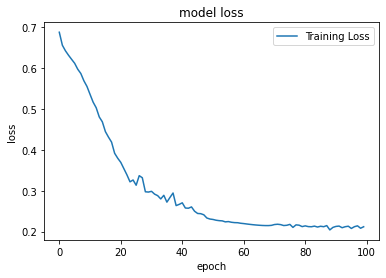

In [45]:
plt.plot(epochs_list,loss_list, label="Training Loss")
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend()
plt.show()

## Evaluate

We use `eval()` to set network's layers to evaluation mode before running inference.<br>
If we wish to resuming training, we can call `network.train()` to set these layers to training mode.

In [46]:
network.eval()

Sequential(
  (0): Linear(in_features=30, out_features=16, bias=True)
  (1): Sigmoid()
  (2): Linear(in_features=16, out_features=16, bias=True)
  (3): Sigmoid()
  (4): Linear(in_features=16, out_features=1, bias=True)
  (5): Sigmoid()
)

Data transformation for the test set

In [47]:
type(X_test)

numpy.ndarray

In [48]:
X_test = torch.tensor(X_test, dtype=torch.float)
type(X_test)

torch.Tensor

### Test model performance

As we can see the model returned us a list with probabilities

In [49]:
predictions = network.forward(X_test)
predictions[:5]

tensor([[0.9869],
        [0.0111],
        [0.0111],
        [0.7101],
        [0.0868]], grad_fn=<SliceBackward>)

We will replace the list of probabilities with a list of booleans. For the sake of this matter, we will use a threshold of 0.5

In [50]:
predictions = np.array(predictions > 0.5)
predictions[:5]

array([[ True],
       [False],
       [False],
       [ True],
       [False]])

In [51]:
y_test[:5]

array([1, 0, 0, 1, 0])

In [52]:
accuracy_score(y_test, predictions)

0.958041958041958

In [53]:
cm = confusion_matrix(y_test, predictions)
cm

array([[46,  5],
       [ 1, 91]])

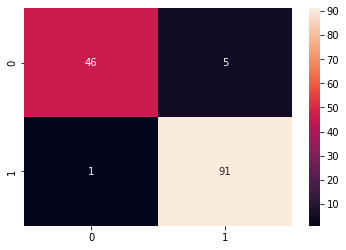

In [54]:
import seaborn as sns
sns.heatmap(cm, annot=True)